In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
image = open('data/a_.png')


In [21]:
img = cv2.imread('data/A.png')
print(img.shape, img.size)

(64, 64, 3) 12288


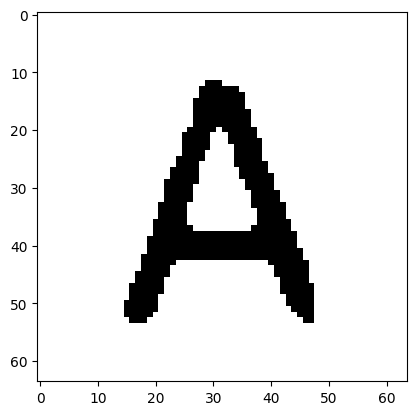

In [47]:
plt.imshow(img)

In [23]:
class DigitalImageInterface:
    def __init__(self, path):
        self.vector = None
        raise NotImplementedError

    def add_noise(self, mean, sigma):
        raise NotImplementedError

    def normalize(self):
        raise NotImplementedError

    def check_correlation(self, other) -> float:
        raise NotImplementedError

In [24]:
class DigitalImage(DigitalImageInterface):
    def __init__(self, path: str):
        self.vector: np.ndarray = cv2.imread(path)

    def add_noise(self, mean, sigma):
        gauss_noise=np.zeros((640,480),dtype=np.uint8)
        cv2.randn(gauss_noise,128,20)
        gauss_noise=(gauss_noise*0.5).astype(np.uint8)
        return cv2.add(self.vector, gauss_noise)

    def normalize(self):
        self.vector = self.normalize_vector(self.vector)
        return self

    def check_correlation(self, other: DigitalImageInterface) -> float:
        return np.dot(self.vector, other.vector) / np.sqrt(np.dot(self.vector, self.vector) * np.dot(other.vector, other.vector))

    @staticmethod
    def normalize_vector(v: np.ndarray):
        return v / np.sqrt(np.dot(v, v))


In [56]:
a = DigitalImage('lenna.png')
a.vector.shape
a.normalize()

ValueError: shapes (64,64,3) and (64,64,3) not aligned: 3 (dim 2) != 64 (dim 1)

In [39]:
lenna = cv2.imread('lenna.png')

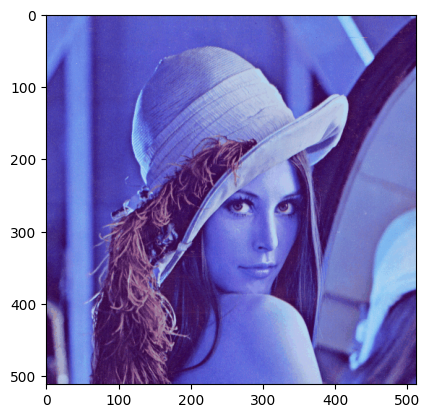

In [60]:
plt.imshow(lenna-255, cmap="gray")

In [65]:
plt.show

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()